**ADM Assignment 1 -- Submitted By**

---


**NOUMAN AHMAD KHAN**

---


**KASHIF IQBAL**

In [32]:
import pandas as pd;
import numpy as np;
from scipy.stats import ttest_1samp;
import os;
from sklearn.preprocessing import StandardScaler;
import matplotlib.pyplot as plt;
from sklearn.decomposition import PCA;



*   importing all the datasets
*   removing duplicate rows
*   imputing mean values in place of mean values
*   Binary encode the Bug column
*   Finding inter quartile range
*   Removing outliers
*   Applying PCA
*   P_value Analysis






In [33]:
directory = 'Datasets/'
final_data_set = [];
for file in os.listdir(directory):
    if file.endswith(".csv"):
       filepath = os.path.join(directory, file);

       # Read the CSV file into a DataFrame
    csv_data = pd.read_csv(filepath)
       # Adjust 'target_column' according to your dataset
    y = csv_data['bug']

       # Adjust 'target_column' according to your dataset
    X = csv_data.drop(columns=['bug'])

       # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

       # Join X_scaled and y
    csv_data = pd.DataFrame(X_scaled, columns=X.columns)
    csv_data['bug'] = y

      # Remove Duplicates rows
    csv_data.drop_duplicates(keep='first', inplace= True)


    #Binary encoding of bug column

       # Replace Bug column values true =1 and false = 0
    csv_data['bug']=csv_data['bug'].map({True:1, False:0})

       # calculate mean of each column
    mean_values = csv_data.mean()

       # Replace null values with mean
    csv_data.fillna(mean_values, inplace=True)

       # Remove Outliers from data frame
    Q1 = csv_data.quantile(0.25);
    Q3 = csv_data.quantile(0.75);

       # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1;

       # Define a threshold for outliers (e.g., 1.5 times the IQR)
    threshold = 1.5;

       # Determine outliers based on the threshold
    outliers = ((csv_data < (Q1 - threshold * IQR)) | (csv_data > (Q3 + threshold * IQR))).any(axis=1);
    df_without_outliers = csv_data[~outliers]

       # Initialize PCA with the desired number of components
    pca = PCA(n_components=5)

       # Fit PCA to the data
    pca.fit(df_without_outliers)

       # Transform the data to its principal components
    transformed_data = pca.transform(df_without_outliers)
    df_after_PCA_analysis = pd.DataFrame(transformed_data)

    total_rows, total_cols = df_after_PCA_analysis.shape
    data = df_without_outliers.to_numpy().flatten()
       # p_value test
    t_statistic, p_value = ttest_1samp(data, 0)

    if p_value < 0.05:
      final_data_set.append(df_without_outliers)

       # Print the results
    print(f"File Name = {file}      rows = {total_rows}       p_value =    {p_value}")

File Name = log4j-1.0.csv      rows = 92       p_value =    2.2928233360086445e-27
File Name = jedit-4.1.csv      rows = 229       p_value =    7.120624003292918e-38
File Name = poi-1.5.csv      rows = 156       p_value =    9.451743621942125e-10
File Name = jedit-4.2.csv      rows = 234       p_value =    4.270099559775452e-115
File Name = arc.csv      rows = 114       p_value =    1.9522294348786794e-82
File Name = camel-1.0.csv      rows = 228       p_value =    5.553444739971898e-51
File Name = synapse-1.2.csv      rows = 179       p_value =    1.699198665373591e-29
File Name = xalan-2.6.csv      rows = 497       p_value =    5.458321809411263e-61
File Name = forrest-0.7.csv      rows = 19       p_value =    5.700029651890511e-05
File Name = systemdata.csv      rows = 43       p_value =    1.0272441555638568e-16
File Name = prop-6.csv      rows = 295       p_value =    8.934408582787961e-30
File Name = tomcat.csv      rows = 482       p_value =    3.4187744555538325e-262
File Name 

**Data integration for files having valid p_values i.e <=0.05**

In [34]:
concatenated_df = pd.concat(final_data_set, ignore_index=True)
concatenated_df.head()

,wmc,dit,noc,cbo,rfc,lcom,loc,bug
0,-0.816936,-0.646162,-0.275087,-0.765885,-1.054537,-0.290338,-0.835295,0
1,0.252075,-0.646162,-0.275087,-0.095942,0.034387,-0.305673,0.089051,0
2,-0.816936,-0.646162,-0.275087,-0.319257,-0.997225,-0.290338,-0.813545,0
3,-0.282430,-0.646162,-0.275087,-0.654228,-0.424107,-0.182995,-0.623239,0
4,-0.816936,0.430775,-0.275087,-0.319257,-0.596042,-0.305673,-0.503618,0


**Correlation Matrix for data after integration**

In [35]:
correlation_matrix = concatenated_df.corr()
print(correlation_matrix)

           wmc       dit       noc       cbo       rfc      lcom       loc  \
wmc   1.000000  0.101397  0.147284  0.263283  0.547423  0.525208  0.523577   
dit   0.101397  1.000000 -0.020129  0.124733  0.138194  0.000782  0.048082   
noc   0.147284 -0.020129  1.000000  0.176117  0.108946  0.490408  0.152340   
cbo   0.263283  0.124733  0.176117  1.000000  0.626776  0.186649  0.484546   
rfc   0.547423  0.138194  0.108946  0.626776  1.000000  0.241798  0.828452   
lcom  0.525208  0.000782  0.490408  0.186649  0.241798  1.000000  0.250828   
loc   0.523577  0.048082  0.152340  0.484546  0.828452  0.250828  1.000000   
bug  -0.002937  0.036832 -0.292590  0.035307  0.075015 -0.171942  0.041366   

           bug  
wmc  -0.002937  
dit   0.036832  
noc  -0.292590  
cbo   0.035307  
rfc   0.075015  
lcom -0.171942  
loc   0.041366  
bug   1.000000  


**Histogram analysis**

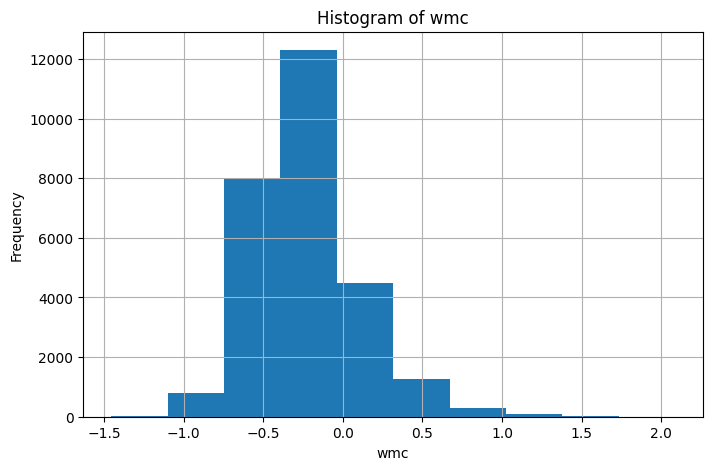

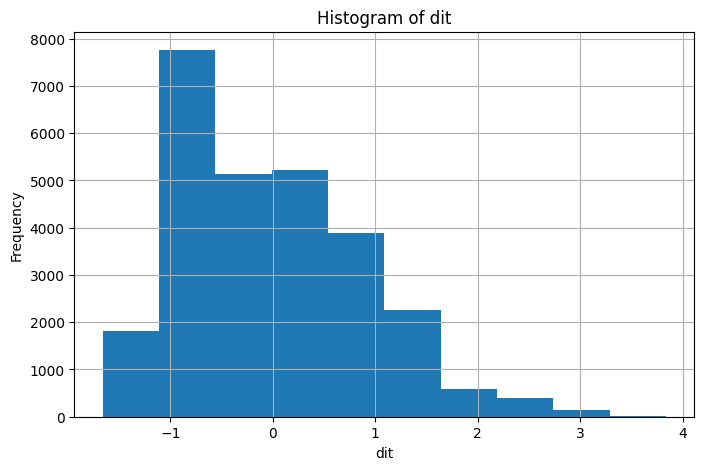

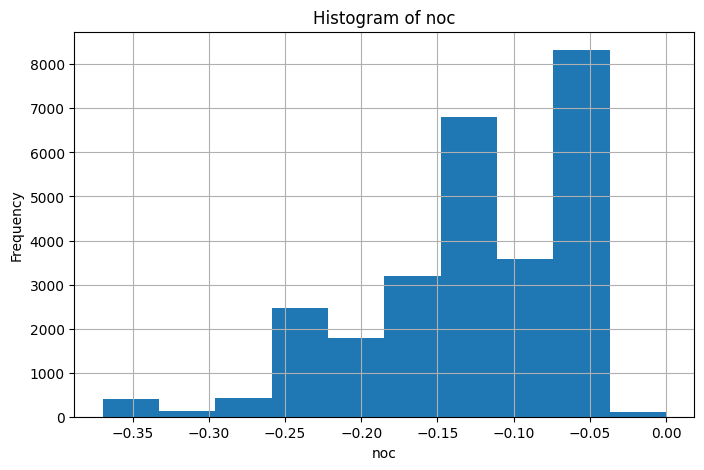

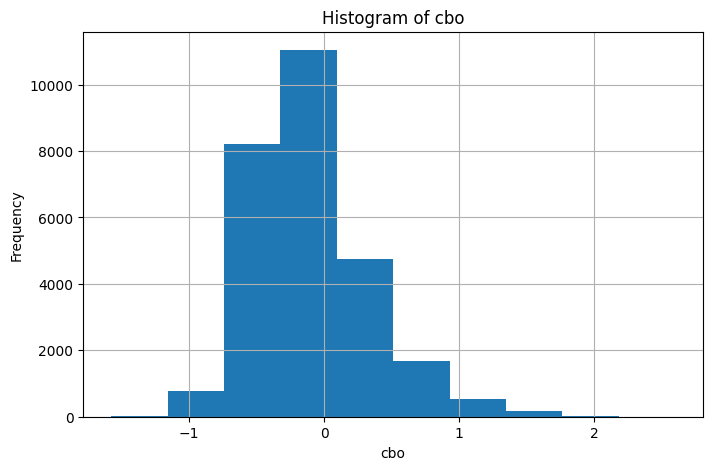

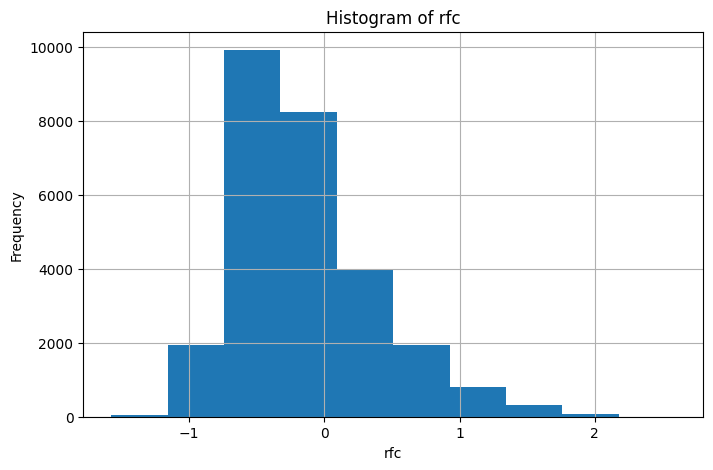

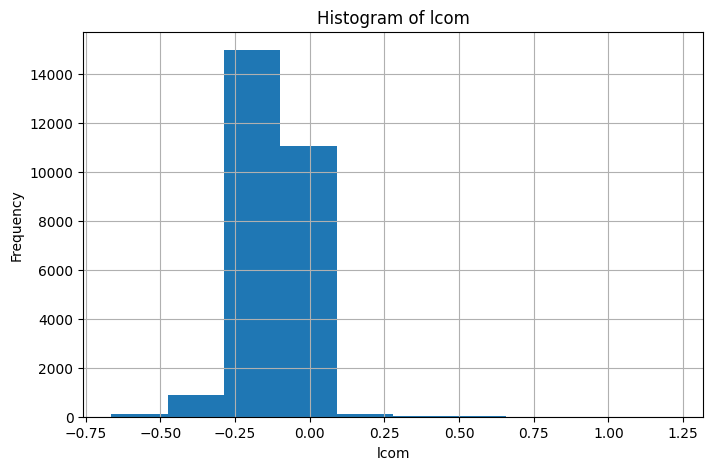

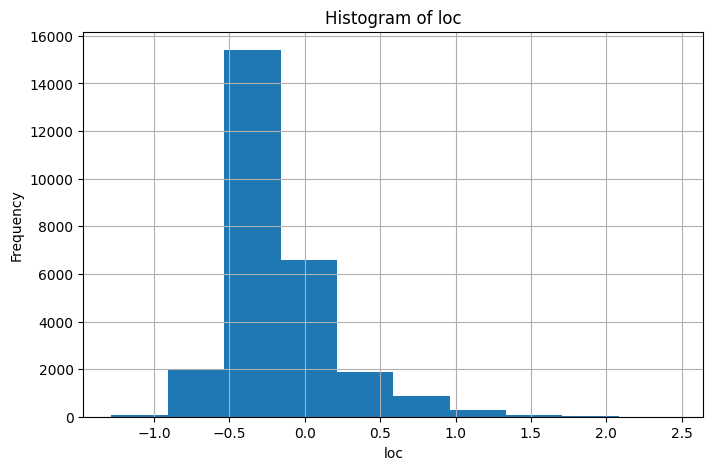

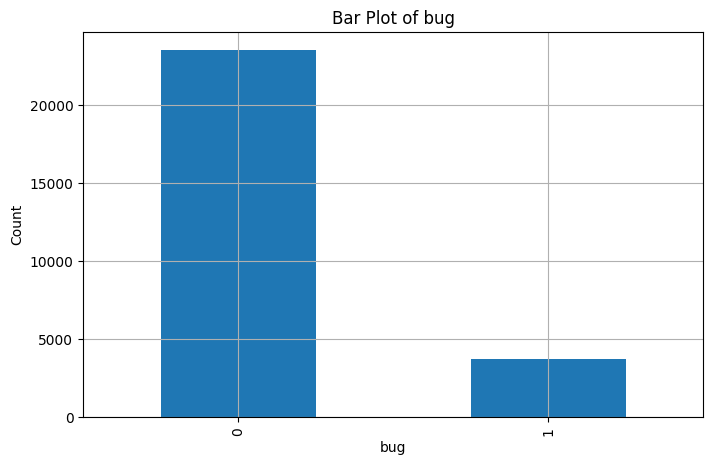

In [36]:
for column in concatenated_df.columns:
    plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

    if concatenated_df[column].dtype == 'object':  # For categorical data
        concatenated_df[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    elif concatenated_df[column].dtype in ['int64', 'float64']:  # For numerical data
        if len(concatenated_df[column].unique()) > 10:  # If many unique values, plot histogram
            concatenated_df[column].plot(kind='hist', bins=10)
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:  # Otherwise, plot bar plot
            concatenated_df[column].value_counts().plot(kind='bar')
            plt.title(f'Bar Plot of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
    else:
        print(f'Unsupported data type for column {column}')

    plt.grid(True)
    plt.show()

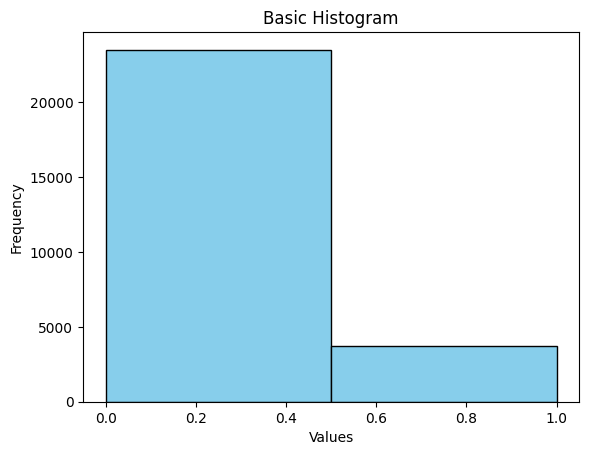

In [37]:
# Plotting a basic histogram
plt.hist(concatenated_df['bug'], bins=2, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

# Display the plot
plt.show()

**Percentage of unbalanced data ratio**

In [38]:
bug_percentage = concatenated_df['bug'].value_counts(normalize=True) * 100

# Calculate percentage of rows with 0s and 1s in the bug column
False_value_percentage = (concatenated_df['bug'] == 0).mean() * 100
True_value_percentage = (concatenated_df['bug'] == 1).mean() * 100

print("Percentage of bug values:")
print(bug_percentage)
print("\nPercentage of rows with 0s and 1s in the bug column:")
print("Percentage of 0s:", False_value_percentage)
print("Percentage of 1s:", True_value_percentage)

Percentage of bug values:
bug
0    86.297344
1    13.702656
Name: proportion, dtype: float64

Percentage of rows with 0s and 1s in the bug column:
Percentage of 0s: 86.29734396238199
Percentage of 1s: 13.702656037618016
